In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer

# PCA - Principal Component Analysis

When dealing with text we looked at the truncated SVD algorithm that could reduce the massive datasets generated from encoding text down to a subset of features. 

PCA is a similar concept, we can take high dimension feature sets and reduce them down to a subset of features used for prediction. PCA is a very common method for dimensionality reduction. 

## PCA Concepts 

PCA reduces dimensionality by breaking down the variance in the data into its "principal components", then keeping only those components that do the best job in explaining said variance. We can understand this well with an example, in 2D. We'll create something that looks like an example from simple linear regression type of data - we have a bunch of points, each point is located by its X and Y values. 

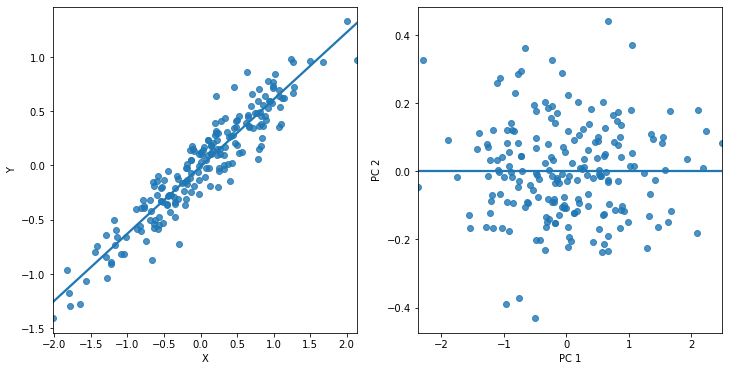

In [2]:
#make some random numbers
plt.rcParams['figure.figsize'] = 12,6
fig, ax = plt.subplots(1, 2)

X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
sns.regplot(data=X, x=X[:,0], y=X[:,1], ci=0, ax=ax[0])
ax[0].set_ylabel('Y')
ax[0].set_xlabel('X')

tmpPCA = PCA(2)
tmpData = tmpPCA.fit_transform(X)
sns.regplot(data=tmpData, x=tmpData[:,0], y=tmpData[:,1], ci=0, ax=ax[1])
ax[1].set_ylabel('PC 2')
ax[1].set_xlabel('PC 1')

plt.show()

## Principal Components

In normal analysis, each of these points is defined by their X and Y values:
<ul>
<li> X - how far left and right the point is.  
<li> Y - how far up and down the point is. 
</ul>

Together these points explain all of the position data of the points. 


Once we look at PCA, we can also think of these points being defined by two components:
<ul>
<li> Along the regression line. The majority of the variance in Y is explained by the position along this line. 
<li> Perpindicular to the regression line. Some smaller part of the variance in Y is explained by how "far off" it is from the regession line.
</ul>

In essence, we can explain the position of our points mostly by examining where it is along the regression line (component 1), along with a little info on how far off it is from that line. These two components can explain our data - "A" amount "up and down" the line, along with "B" amount "off the line". This also explains the position of the points, but does so with different values than X and Y. 

If we look at the plot of the PCA components, PC1 (plotted as X) has a wide range, or lots of variance. PC2 (plotted as Y) has a small range, or a small amount of variance. 

#### Animated Example

See: https://setosa.io/ev/principal-component-analysis/ 

### PCA and Eigenvectors

The components generated by the PCA are called eigenvectors. We don't need to worry about much of the math, but this PCA can be calculated by hand with some linear math. We can skip that, computers are good at math. 

## PCA and Dimensionality Reduction

Once we've established the components, reducing the dimensions of our feature set is simple - just reduce the components that matter least to 0. In our example, we'd ignore the "off the line" component that is responsible for only a little bit of the position of our points, and keep the "up the line" component that explains the majority of the position of our points. 

In the XY system, both X and Y are very important in specifying where a point is, X somewhat more important than Y. In our component system, the "up the line" component provides the majority of the information on our points, with the "off the line" component only adding a little bit of info. This is the key to the dimensionality reduction - if we feature selected away the Y value, we would lose substantial information on the location of the points. If we PCA-away the "off the line" component, we only lose a small amount of information! So we can describe this data "pretty well" with only 1/2 the number of features if we describe the data with the components over the original features. When dealing with large numbers of features, this can allow us to reduce them down to a much smaller number of components, without missing out on too much information describing the real data. 

The true benefit of PCA is if there are a lot of features. We can do something like the example here to grab the "best" components, drop the rest, and have a smaller feature set with a comparable level of accuracy. 

#### Colinearity and Multi-colinearity

One of the other benefits of PCA is that it reduces colinearity between features. The components that PCA generates are orthogonal of each other - the colinearity is reduced to effectively 0. 

## Dimension Reduction in Multiple Dimensions

This 2D example is simple to picture. The same concept applies when we have data with lots of dimensions. We can break the data down into components, remove the least impactful, and end up with a feature set that captures most of the variance in our target with fewer inputs. 

### Example with Real Data

This dataset is one of the sklearn samples, containing measurements from people with and without breast cancer. The classification of cancer/no cancer is the target. 

In [3]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(load_breast_cancer())
y1 = df["target"]
X1 = df.drop(columns="target")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Pre PCA Test

We can run a test to approximate the accuracy without doing PCA. We don't want accuracy to drop too much after the PCA process. This is our baseline. 

In [4]:
pre_model = LogisticRegression()
pre_scale = MinMaxScaler()
pre_pipe = Pipeline([("scale", pre_scale), ("model", pre_model)])
print("Estimated Initial Accuracy:", np.mean(cross_val_score(pre_pipe, X1, y1)))

Estimated Initial Accuracy: 0.9613414066138798


### Original Dimensionality and Correlation

One classfication target, along with 30 features. We can look for correlation between those features. 

<AxesSubplot:>

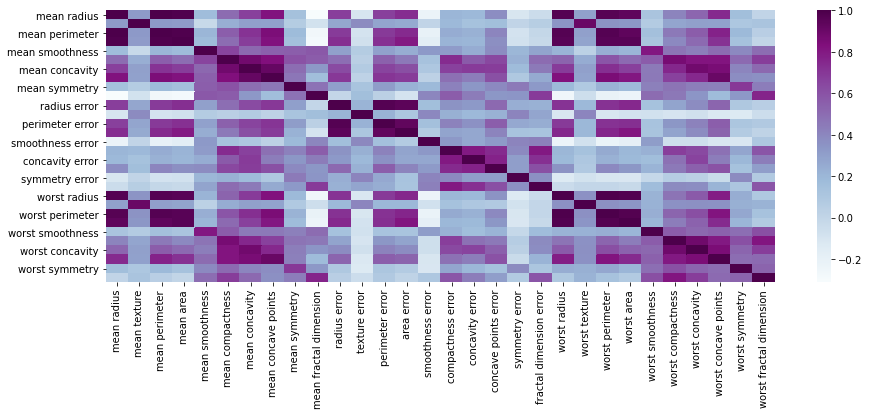

In [5]:
# Check Original Correlation
plt.rcParams['figure.figsize'] = 15,5
sns.heatmap(X1.corr(), cmap="BuPu")

In [6]:
# Calculate VIF for Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif.sort_values("VIF Factor", ascending=False).head(10)

,VIF Factor,features
0,63306.172036,mean radius
2,58123.586079,mean perimeter
20,9674.742602,worst radius
22,4487.781270,worst perimeter
3,1287.262339,mean area
23,1138.759252,worst area
9,629.679874,mean fractal dimension
29,423.396723,worst fractal dimension
4,393.398166,mean smoothness
24,375.597155,worst smoothness


#### Colinearity Results

Looks like there is a lot of correlation going on. The heatmap shows many values that are pretty correlated, and the VIF shows some really high values. Recall, values for a VIF over about 10 are really large. 

For the model, we'll be sure to use a logistic regression, that is very impacted by the colinearity. 

Feel free to play with the number of components and observe results. 

In [7]:
#Check accuracy 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1)
can_pca = PCA()
can_model = LogisticRegression()
can_steps = [
    ("scale", MinMaxScaler()), 
    ("pca", can_pca),
    ("can_model", can_model)
    ]
can_pipe = Pipeline(steps=can_steps)
can_params = {
    "pca__n_components":[15]
}

clf1 = GridSearchCV(estimator=can_pipe, param_grid=can_params, cv=5, n_jobs=-1) 
clf1.fit(X_train1, y_train1.ravel())
print(clf1.score(X_test1, y_test1))
best1 = clf1.best_estimator_
print(best1)


0.9790209790209791
Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=15)),
                ('can_model', LogisticRegression())])


#### Results - We Have Accuracy!

Accuracy looks pretty good, even though we've reduced the number of features. How is the information on our target (the variance) distributed amongst our components? 

Text(0, 0.5, 'cumulative explained variance')

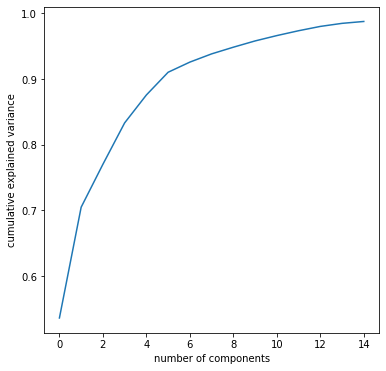

In [8]:
# Get PCA Info
comps1 = best1.named_steps['pca'].components_ 
ev1 = best1.named_steps['pca'].explained_variance_ratio_
plt.rcParams['figure.figsize'] = 6,6
plt.plot(np.cumsum(ev1))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#### What is in the PCA Components?

We can also reconstruct the importance of the contributions of the different features to the components. 

In [9]:
labels = []
for i in range(len(comps1)):
    label = "PC-"+str(i)
    labels.append(label)

PCA1_res_comps = pd.DataFrame(comps1,columns=X1.columns, index = labels)
PCA1_res_comps.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC-0,0.247499,0.102365,0.256299,0.216004,0.101665,0.235427,0.292310,0.335895,0.113939,0.041767,...,0.262937,0.126886,0.263613,0.205494,0.110642,0.198003,0.252490,0.360283,0.109813,0.090697
PC-1,-0.260108,-0.046415,-0.235189,-0.228702,0.181528,0.220154,0.120346,-0.003298,0.215408,0.410190,...,-0.241530,-0.020197,-0.206124,-0.196273,0.211905,0.204178,0.174101,0.043754,0.164641,0.256494
PC-2,0.040465,-0.048517,0.047486,0.082115,-0.026846,0.034160,0.133642,0.085056,0.052012,0.097000,...,-0.029462,-0.234406,-0.020702,0.014842,-0.280514,-0.221892,-0.168680,-0.200656,-0.273270,-0.160078
PC-3,-0.055320,0.567249,-0.055650,-0.044208,-0.120463,-0.052089,-0.021832,-0.081820,-0.034379,-0.052306,...,-0.034276,0.682799,-0.030577,-0.024152,-0.069070,0.016364,0.010818,-0.082195,-0.012371,-0.005332
PC-4,-0.002971,0.020735,0.000772,-0.020137,-0.282744,0.036551,0.112393,-0.072887,-0.466794,0.027293,...,-0.046368,-0.038530,-0.022728,-0.049923,-0.248755,0.183641,0.252619,0.068532,-0.401244,0.147048


#### Results of PCA

PCA allows us to reduce down the original 30 feature set to a much smaller number, while still making accurate predictions. In this case, it looks like we can get about 90% of the explained varaiance in the data by using around 6 or so components. Yay, that's cool!

## PCA and Feature Selection

PCA is not a feature selection technique. PCA does do a similar thing to feature selection in reducing the size of our feature set that goes into a model, but it is technically different. 

Feature selection removes features. PCA removes components, that are created from features, but that are not, themselves, features. In PCA, the features are being transformed for the components to be created, and each component includes portions of multiple features - for example, in the scatter plot above, both the "up the line" and "off the line" components contain parts of the X and Y features. If we drop the "off the line" feature when doing PCA we aren't really eliminating any features - we still need X and Y to calculate each of our components. In the breast cancer example, each of those features still contributes to the components, but the actual predictors are far reduced. 

## Example

Predict if people have diabetes (Outcome) using PCA to help. 

In [10]:
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#Get data
y = df["Outcome"]
X = df.drop(columns={"Outcome"})
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Model and grid search of components. 
scaler = MinMaxScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pca_dia = PCA()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca_dia), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [8]
}

grid = GridSearchCV(pipe, param_grid, n_jobs=4)
grid.fit(X_train, y_train)
best2 = grid.best_estimator_
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.759):
{'pca__n_components': 8}


#### Plot Component Importance

We can plot the effectiveness with different numbers of components. 

Text(0, 0.5, 'cumulative explained variance')

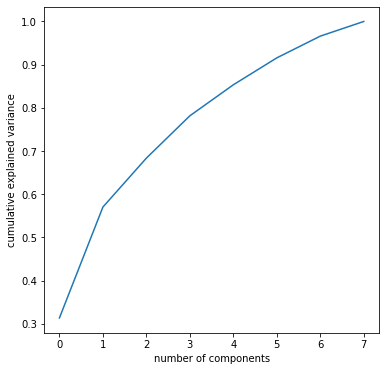

In [12]:
comps2 = best2.named_steps['pca'].components_ 
ev2 = best2.named_steps['pca'].explained_variance_ratio_
plt.rcParams['figure.figsize'] = 6,6
plt.plot(np.cumsum(ev2))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## PCA with Images - Big Dimensions!

One common example of something with a large feature set is images - even our simple set of handwritten numbers had 784 features for each digit. Generating models from all 70,000 of those simple images could take forever, and those are about the most simple images we can imagine!

Reducing the dimensions of very large images can be highly beneficial, especially if we can keep the useful bits that we need to do identification. 

### Faces, PCA, and You

This dataset is a more complex set of images than the digits we used previously. It is a set of a bunch of faces of past world leaders, our goal being to make a model that will recognize each person from their picture. 

In [13]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


### Starting Dimensions and PCA Dimensions

We start with ~1350 images, each 62 x 47 pixels, color depth of 1 - resulting in a feature set that is around 3000 columns wide. 

We can fit the data to a PCA transformation, and chop the feature set down to a much smaller number of components. 

In [14]:
# Generate PCA and inversed face-sets
pca150 = PCA(150).fit(faces.data)
components150 = pca150.transform(faces.data)
projected150 = pca150.inverse_transform(components150)

pca15 = PCA(15).fit(faces.data)
components15 = pca15.transform(faces.data)
projected15 = pca15.inverse_transform(components15)

### Picture Some Pictures

We can look at what the pictures look like in their original state, and after the PCA process has reduced their dimensions by various amounts. 

Text(0, 0.5, '15-dim')

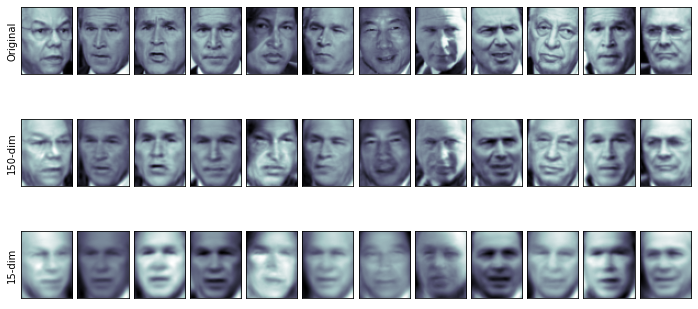

In [15]:
# Plot faces and PCA faces
fig, ax = plt.subplots(3, 12, figsize=(12, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(12):
    ax[0,i].imshow(faces.data[i].reshape(62, 47), cmap='bone')
    ax[1,i].imshow(projected150[i].reshape(62, 47), cmap='bone')
    ax[2,i].imshow(projected15[i].reshape(62, 47), cmap='bone')

ax[0, 0].set_ylabel('Original')
ax[1, 0].set_ylabel('150-dim')
ax[2, 0].set_ylabel('15-dim')

### Amount of Variance Captured in Components

We can look at our PCA'd data and see that while the images are much less clear and defined, they are pretty similar on the whole! We can probably still do a good job of IDing the people, even though we have roughly 1/20 (or 1/200) the number of features as we started with. Cool. Even with the 15 component set, the images are still somewhat able to be recognized. 

The PCA allows us to call up the details on how much of the variance was captured in each component. The first few contain lots of the useful info, once we reach 20 components we have about ~75% or so of the original varaince. 

Text(0, 0.5, 'cumulative explained variance')

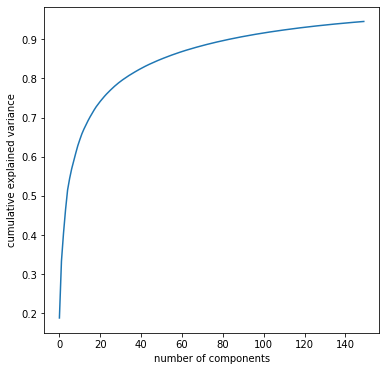

In [16]:
plt.plot(np.cumsum(pca150.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

### Scree Plot and Number of Components

One question we're left with is how many components should we keep? This answer varies, common suggestions are enough to capture somewhere around 80% to 95% of the explained variance. These metrics are somewhat arbitrary - testing different numbers of components will likely make sense in many cases. 

One method to choose the number of features is a scree plot. This is a plot that shows the contribution of each component. The scree plot shows the same information as the graph above, but formatted differently. The idea of a scree plot is to find the "elbow", or where the plot levels out. This flattening point is approximately where you should cut off the number of components - the idea being that you capture all the components that make a substantial difference, and let the ones that make a small difference go. 

Personally, I think the cumulative plot above is easier to view, but scree plots are pretty common. 

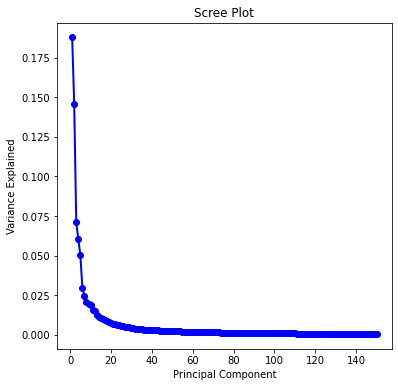

In [17]:
#Scree Plot
PC_values = np.arange(pca150.n_components_) + 1
plt.plot(PC_values, pca150.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### Predictions with PCA

We can try to make some predictions and see what the results are with PCA'd data. We'll use a multinomial HP to tell our regression to directly predict multiple classes with our friend the softmax. 

In [18]:
#Get data
y = faces.target
X = faces.data
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Model and grid search of components. 
scaler = MinMaxScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1, multi_class="multinomial")
pca_dia = PCA()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca_dia), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [130]
}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(X_train, y_train.ravel())
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print("Test Score:", grid.score(X_test, y_test))

Best parameter (CV score=0.821):
{'pca__n_components': 130}
Test Score: 0.8308605341246291


## Kernel PCA

Similarly to support vector machines, we can use a kernel transformation to make PCA better suit data with non-linear relationships. The concept is the same as with the SVMs - we can provide a kernel that does a transformation, then the linear algebra of PCA can be executed on the transformed data. 

The implementation is very simple - we replace PCA with KernelPCA, and provide the kernel we want to use. 

We can see if a different kernel is better than the original... Try with a grid search of the different kernels other than linear. Also, for the polynomial kernel, try with multiple values in the grid search. Documentation is: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html 

In [19]:
# Use Kernel PCA
from sklearn.decomposition import KernelPCA

#Get data
y = faces.target
X = faces.data
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Model and grid search of components. 
scaler = MinMaxScaler()
logistic = LogisticRegression(max_iter=10000, tol=0.1, multi_class="multinomial")
pca_dia = KernelPCA()
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca_dia), ("logistic", logistic)])

param_grid = {
    "pca__n_components": [150],
    "pca__kernel": ["poly", "rbf", "sigmoid", "cosine"],
    "pca__degree": [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(X_train, y_train.ravel())
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print("Test Score:", grid.score(X_test, y_test))

Best parameter (CV score=0.790):
{'pca__degree': 14, 'pca__kernel': 'poly', 'pca__n_components': 150}
Test Score: 0.7863501483679525


## Sparse PCA

Sparse PCA is another implementation of PCA that includes L1 regularization - resulting in some of the values being regularized down to 0. The end result of this is that you end up with a subset of the features being used to construct the components. The others are feature selected out just like Lasso rregression. 

In [20]:
from sklearn.decomposition import SparsePCA

sPCA = SparsePCA(15)
sparse = sPCA.fit_transform(X1)

comps3 = sPCA.components_ 
labels = []
for i in range(len(comps3)):
    label = "PC-"+str(i)
    labels.append(label)

PCA3_res_comps = pd.DataFrame(comps3, columns=X1.columns, index = labels)
PCA3_res_comps.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC-0,0.0,0.0,0.0,-0.400095,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000848,0.0,0.0,-0.916424,0.0,0.0,0.000000,0.0,0.0,0.0
PC-1,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
PC-2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
PC-3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
PC-4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.0,0.0,0.000000,0.0,0.0,-0.000357,0.0,0.0,0.0


In [21]:
PCA3_res_comps.describe().T.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
area error,15.0,-0.067301,0.258035,-0.999999,0.0,0.0,0.0,0.000000
worst texture,15.0,-0.066667,0.258199,-1.000000,0.0,0.0,0.0,0.000000
perimeter error,15.0,-0.066440,0.257322,-0.996605,0.0,0.0,0.0,0.000000
mean perimeter,15.0,-0.065843,0.257785,-0.997633,0.0,0.0,0.0,0.009995
worst perimeter,15.0,-0.045825,0.275279,-0.997963,0.0,0.0,0.0,0.310595
radius error,15.0,-0.005599,0.021233,-0.082337,0.0,0.0,0.0,0.000000
worst concavity,15.0,-0.000167,0.000593,-0.002279,0.0,0.0,0.0,0.000135
mean concavity,15.0,-0.000033,0.000129,-0.000498,0.0,0.0,0.0,0.000000
worst concave points,15.0,-0.000024,0.000093,-0.000359,0.0,0.0,0.0,0.000000
worst compactness,15.0,-0.000010,0.000146,-0.000457,0.0,0.0,0.0,0.000304
